In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def cropped_cdf(t, tau, time_window):
    cdf = (np.exp(-time_window[0]/tau)-np.exp(-t/tau))/(np.exp(-time_window[0]/tau) - np.exp(-time_window[1]/tau))
    return cdf

def cropped_pdf(t, tau, time_window):
    pdf = 1/tau * 1/((np.exp(-time_window[0]/tau) - np.exp(-time_window[1]/tau))) * np.exp(-t/tau)
    return pdf

In [2]:
# code sample to randomly sample decay times from a distribution

tau_Po218 = 3.097 * 60 / np.log(2)
tau_Pb214 = 27.06 * 60 / np.log(2)
tau_At218 = 1.27 / np.log(2)
tau_Bi214 = 19.71 * 60 / np.log(2)
tau_Po214 = 163.6E-6 / np.log(2)
tau_Tl210 = 1.3 * 60 / np.log(2)
tau_Pb210 = 22.2 * (60 * 60 * 24 * 365) / np.log(2)

tau = tau_At218 # 100 * s mean half life
tau_prior = tau_Po218
time_window = [0, 1] # in s
samples = int(1E6)

u = np.random.uniform(0,1,samples)

time_ini = np.random.uniform(time_window[0],time_window[1],samples) # initial time
time_decay = - np.log(1-u) * tau # decay time
time_tot = time_ini + time_decay

inside = (time_tot<= time_window[1]).sum()/samples
legacy = tau/tau_prior * (np.exp(-time_window[0]/tau)-np.exp(-time_window[1]/tau))
print("{:.3f} % of coincident decays are within [{}, {}] s window.".format(inside * 100, time_window[0], time_window[1]))
print("{:.3f} % of legacy events are within [{}, {}] s window.".format(legacy * 100, time_window[0], time_window[1]))

22.968 % of coincident decays are within [0, 1] s window.
0.287 % of legacy events are within [0, 1] s window.


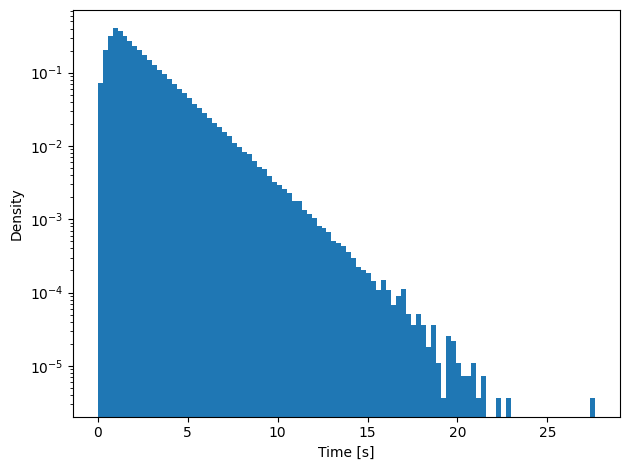

In [3]:
fig, ax = plt.subplots(1,1)

ax.hist(time_tot, bins = 100, density=True)
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Density")

plt.tight_layout()

100.000 % of decays are within [0, 1] s window.


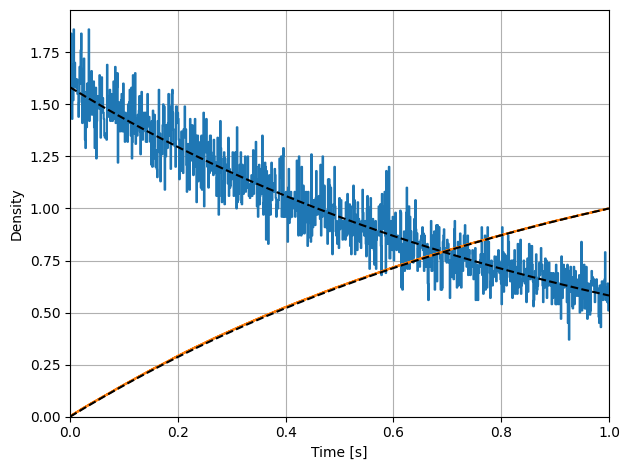

In [5]:
# code to randomly sample decay times from a distribution

tau = 1 # 100 * s mean half life
time_window = [0, 1] # in s
samples = int(1E5)

u = np.random.uniform(0,1,samples)

time_ini = np.random.uniform(time_window[0],time_window[1],samples) # initial time
time_decay = -tau * np.log(1 - u * (1 - np.exp(-time_window[1]/tau))) # decay time
time_tot = time_decay

inside = (time_tot<= time_window[1]).sum()/samples
print("{:.3f} % of decays are within [{}, {}] s window.".format(inside * 100, time_window[0], time_window[1]))


bins = 1000
y, bin_edges = np.histogram(time_tot, density=True, bins = bins)
x = (bin_edges[1:]+bin_edges[:-1])/2


tt = np.linspace(0, 1, num=bins)

fig, ax = plt.subplots(1,1)

ax.step(x, y, label = "pdf")
ax.step(x, np.cumsum(y)/bins)

ax.plot(tt, cropped_pdf(tt, tau, time_window), color = "k", ls = "--")
ax.plot(tt, cropped_cdf(tt, tau, time_window), color = "k", ls = "--")

ax.set_xlabel("Time [s]")
ax.set_ylabel("Density")

ax.set_xlim(time_window[0], time_window[1])
ax.set_ylim(0,)
plt.grid(True)
#plt.yscale("log")
plt.tight_layout()
